In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import os

hutter_csv = "../data/hutter/hutter.csv"

hutter_df = pd.read_csv(hutter_csv)

hutter_df.sort_values(["Decomp Time"],  
                    axis=0, 
                    ascending=[True],  
                    inplace=True, ignore_index=True)

N= 10

hutter_df = hutter_df.head(N)

def ns_byte_to_mb_s(data):
    return 1/(data*(pow(10,-3)))

hutter_df

,Program,enwik8,enwik9,Decompresser,Unnamed: 4,Total size enwik9+prog,Comp Time,Decomp Time,Mem,Alg,Note
0,ulz 0.06 c9,32945292.0,291028084,49450,x,291077534.0,325.0,1.1,490,LZ77,82.0
1,nakamichi 2019-Jul-01,32917888.0,277293058,112899,s,277405957.0,8200000.0,1.3,302000,LZSS,85.0
2,lz4x 1.02 c4,41950112.0,372068437,48609,x,372117046.0,79.0,1.4,114,LZ77,68.0
3,lzf 1.02 cx,45198298.0,406805983,48359,x,406854342.0,68.0,2.2,151,LZ77,68.0
4,zstd 0.6.0 -22 --ultra,25405601.0,215674670,69687,s,215744357.0,701.0,2.2,792,LZ77,76.0
5,lzss 0.02 cx,42874387.0,380192378,48114,x,380240492.0,107.0,2.3,145,LZSS,63.0
6,lzv 0.1.0,54950847.0,488436027,10385,x,488446412.0,4.0,2.6,3,LZ77,48.0
7,crush 1.00 cx,31731711.0,279491430,2489,s,279493919.0,948.0,2.9,148,LZ77,60.0
8,doboz 0.1,36367430.0,322415409,83591,x,322499000.0,533.0,3.4,1200,LZ77,48.0
9,zhuff 0.97 beta -c2,34907478.0,308530122,63209,x,308593331.0,24.0,3.5,32,LZ77,48.0


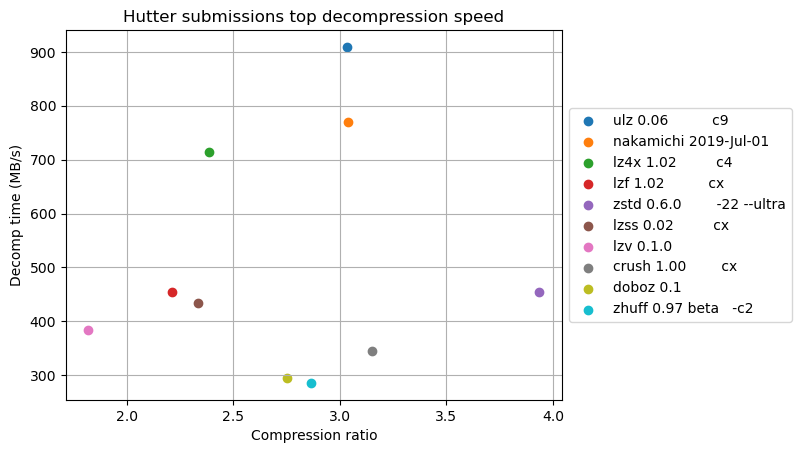

In [111]:
ratio = 100000000/hutter_df['enwik8']
decomp = ns_byte_to_mb_s(hutter_df['Decomp Time'])
names = hutter_df['Program']


fig_hutter, ax_hutter = plt.subplots()
# colormap = plt.cm.nipy_spectral
# colors = colormap(np.linspace(0, 1, N))
# ax_hutter.set_prop_cycle('color', colors)

for i, name in enumerate(names):
    ax_hutter.scatter(ratio[i], decomp[i], label=name)


ax_hutter.set_title('Hutter submissions top decompression speed')
ax_hutter.set_xlabel('Compression ratio')
ax_hutter.set_ylabel('Decomp time (MB/s)')
ax_hutter.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax_hutter.grid(True)  


fig_hutter.savefig('hutter-decomp.svg')
